In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Defining Gaussian functions for convolution with spectrum data

In [2]:
def gaussian_function(a, mu, sigma, num_points, x_min, x_max):
    pre_fact = (a/sigma)/(np.sqrt(2*np.pi))
    x = np.linspace(x_min, x_max, num_points)
    x_input = np.array((-1/2)/(np.square(sigma))*np.square(x-mu))
    gaussian_fun = pre_fact*np.exp(x_input)
    
    return x, gaussian_fun
    
def gaussian_function_vector(a_vec, mu_vec, sigma, num_points, x_min, x_max):
    for i in range(len(a_vec)):
        if i==0:
            sum_vec = np.zeros(num_points)
        energy_grid, conv_vec = gaussian_function(a_vec[i], mu_vec[i], sigma, num_points, x_min, x_max)
        sum_vec += conv_vec
    return energy_grid, sum_vec

In order to read the IR spectrum we use the following piece of script on terminal:
```
cat out_geo_opt.log | grep 'IR SPECTRUM' -A 20 | awk '{print $2" " $3}' | grep -v 'SPECTRUM\|freq' > ir_freq.log
```
Now, we can read the data using `np.loadtxt` function.

In [3]:
spec = np.loadtxt('1_geometry_optimization_dzvp/ir_freq.log')
print(spec)

[[3.29880000e+02 4.05612070e+01]
 [8.35100000e+02 1.60746877e+02]
 [9.76460000e+02 2.57100000e-02]
 [1.08473000e+03 1.50944150e+01]
 [1.16594000e+03 5.43227000e+00]
 [1.33657000e+03 2.99669000e-01]
 [1.44479000e+03 3.04487600e+00]
 [1.47516000e+03 1.16234570e+01]
 [1.49187000e+03 2.58608300e+00]
 [1.64308000e+03 1.57972430e+01]
 [2.93815000e+03 1.06044149e+02]
 [3.05354000e+03 4.04552330e+01]
 [3.09783000e+03 3.09914930e+01]
 [3.48108000e+03 7.93543000e-01]
 [3.55183000e+03 3.46182000e-01]]


Here, we will be performing the convolution by performing the weighted Gaussians with a $\sigma$ value of `10.0 cm-1`.

<IPython.core.display.Javascript object>


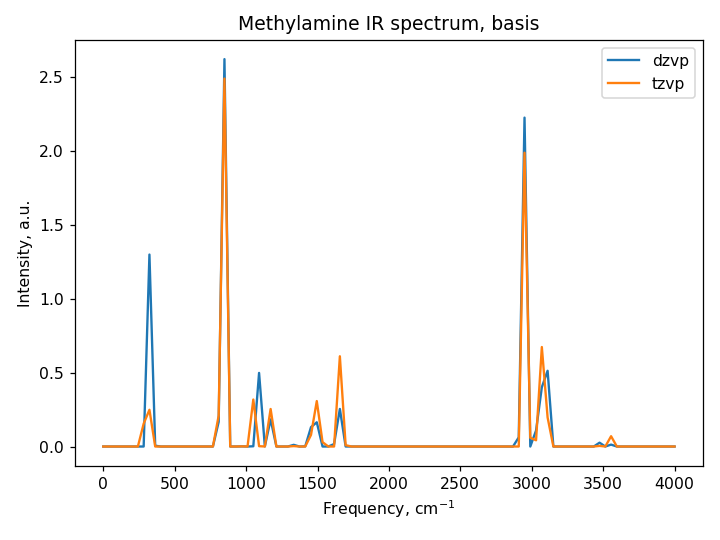

In [12]:
%matplotlib notebook
for basis in ['dzvp','tzvp']:
    sigma = 10.0
    num_points = 100
    x_min = 0
    x_max = 4000
    spec = np.loadtxt(F'1_geometry_optimization_{basis}/ir_freq.log')
    grid, weights = gaussian_function_vector(spec[:,1], spec[:,0], sigma, num_points, x_min, x_max)
    plt.plot(grid, weights, label=basis)
plt.title('Methylamine IR spectrum, basis')
plt.ylabel('Intensity, a.u.')
plt.xlabel('Frequency, cm$^{-1}$')
plt.legend()
plt.tight_layout()

Now, we do the same for the UV-VIS spectrum and for the other basis.
```
cat 2_tddft_dzvp/out_tddft.log | grep 'ABSORPTION SPECTRUM' -A 30 | awk '{print $3 " " $4}' | grep '^[0-9]' > 2_tddft_dzvp/uv-vis.txt
```

<IPython.core.display.Javascript object>


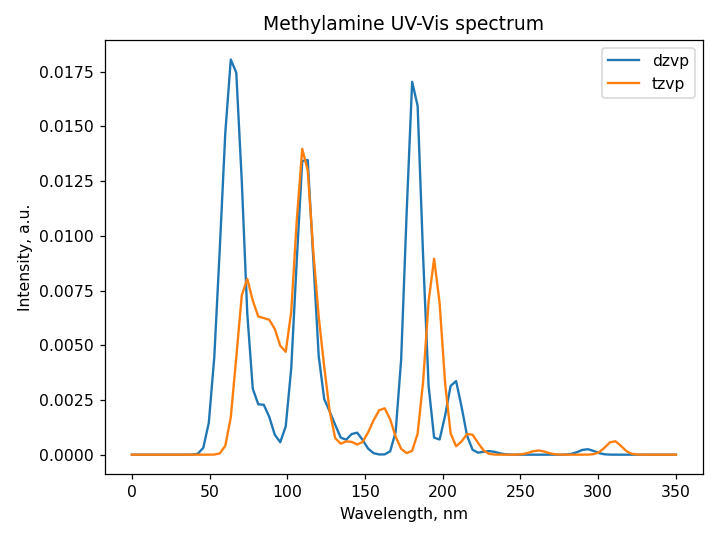

In [13]:
%matplotlib notebook
for basis in ['dzvp','tzvp']:
    spec = np.loadtxt(F'2_tddft_{basis}/uv-vis.txt')

    sigma = 5.0
    num_points = 100
    x_min = 0
    x_max = 350
    grid, weights = gaussian_function_vector(spec[:,1], spec[:,0], sigma, num_points, x_min, x_max)
    plt.plot(grid, weights, label=basis)
plt.title('Methylamine UV-Vis spectrum')
plt.ylabel('Intensity, a.u.')
plt.xlabel('Wavelength, nm')
plt.legend()
plt.tight_layout()
    

# Other properies
## 1. DZVP

```
----------------
ORBITAL ENERGIES
----------------
...
HOMO   8   2.0000      -0.225863        -6.1460
LUMO   9   0.0000       0.058567         1.5937
...

-----------------------
MULLIKEN ATOMIC CHARGES
-----------------------
   0 N :   -0.250368
   1 C :    0.062636
   2 H :    0.010910
   3 H :    0.011544
   4 H :   -0.010314
   5 H :    0.087645
   6 H :    0.087947


----------------------
LOEWDIN ATOMIC CHARGES
----------------------
   0 N :   -0.131795
   1 C :   -0.001912
   2 H :    0.017626
   3 H :    0.017915
   4 H :   -0.005592
   5 H :    0.051839
   6 H :    0.051919


-------------
DIPOLE MOMENT
-------------
                                X             Y             Z
Electronic contribution:      1.07641       0.24393       0.30442
Nuclear contribution   :     -0.62718      -0.20155      -0.34613
                        -----------------------------------------
Total Dipole Moment    :      0.44923       0.04237      -0.04171
                        -----------------------------------------
Magnitude (a.u.)       :      0.45315
Magnitude (Debye)      :      1.15182


--------------------
Rotational spectrum
--------------------

Rotational constants in cm-1:    12.215976     2.714031     2.609772
Rotational constants in MHz : 366225.759028 81364.612763 78239.004767

 Dipole components along the rotational axes:
x,y,z [a.u.] :     0.449489    -0.057508    -0.000229
x,y,z [Debye]:     1.142509    -0.146173    -0.000582


------------
INNER ENERGY
------------
Total thermal energy                    -90.97545338 Eh


--------
ENTHALPY
--------

The enthalpy is H = U + kB*T
                kB is Boltzmann's constant
Total free energy                 ...    -90.97545338 Eh
Thermal Enthalpy correction       ...      0.00094421 Eh       0.59 kcal/mol
-----------------------------------------------------------------------
Total Enthalpy                    ...    -90.97450918 Eh


-------
ENTROPY
-------

The entropy contributions are T*S = T*(S(el)+S(vib)+S(rot)+S(trans))
     S(el)   - electronic entropy
     S(vib)  - vibrational entropy
     S(rot)  - rotational entropy
     S(trans)- translational entropy
The entropies will be listed as mutliplied by the temperature to get
units of energy

Electronic entropy                ...      0.00000000 Eh      0.00 kcal/mol
Vibrational entropy               ...     -0.00000000 Eh     -0.00 kcal/mol
Rotational entropy                ...      0.00740508 Eh      4.65 kcal/mol
Translational entropy             ...      0.01721518 Eh     10.80 kcal/mol
-----------------------------------------------------------------------
Final entropy term                ...      0.02462025 Eh     15.45 kcal/mol


-------------------
GIBBS FREE ENERGY
-------------------

The Gibbs free energy is G = H - T*S

Total enthalpy                    ...    -90.97450918 Eh
Total entropy correction          ...     -0.02462025 Eh    -15.45 kcal/mol
-----------------------------------------------------------------------
Final Gibbs free energy         ...    -90.99912943 Eh

For completeness - the Gibbs free energy minus the electronic energy
G-E(el)                           ...      0.15455105 Eh     96.98 kcal/mol



```

## 2. TZVP


```

----------------
ORBITAL ENERGIES
----------------

  NO   OCC          E(Eh)            E(eV)
...
HOMO   8   2.0000      -0.237295        -6.4571
LUMO   9   0.0000       0.031833         0.8662
...

-----------------------
MULLIKEN ATOMIC CHARGES
-----------------------
   0 N :    1.663701
   1 C :   -0.316422
   2 H :   -0.161230
   3 H :   -0.169832
   4 H :   -0.381311
   5 H :   -0.314071
   6 H :   -0.320834
   
----------------------
LOEWDIN ATOMIC CHARGES
----------------------
   0 N :    0.435878
   1 C :   -0.371264
   2 H :    0.020132
   3 H :    0.020066
   4 H :    0.000601
   5 H :   -0.052795
   6 H :   -0.052618

-------------
DIPOLE MOMENT
-------------
                                X             Y             Z
Electronic contribution:      0.56067      -0.06525      -0.12225
Nuclear contribution   :     -0.60752      -0.19188      -0.33064
                        -----------------------------------------
Total Dipole Moment    :     -0.04685      -0.25712      -0.45289
                        -----------------------------------------
Magnitude (a.u.)       :      0.52290
Magnitude (Debye)      :      1.32909


--------------------
Rotational spectrum
--------------------

Rotational constants in cm-1:    12.394678     2.713928     2.606025
Rotational constants in MHz : 371583.092357 81361.526129 78126.671856

 Dipole components along the rotational axes:
x,y,z [a.u.] :    -0.027424    -0.005123    -0.522150
x,y,z [Debye]:    -0.069707    -0.013023    -1.327200


------------
INNER ENERGY
------------
Total thermal energy                    -91.16222956 Eh


--------
ENTHALPY
--------

The enthalpy is H = U + kB*T
                kB is Boltzmann's constant
Total free energy                 ...    -91.16222956 Eh
Thermal Enthalpy correction       ...      0.00094421 Eh       0.59 kcal/mol
-----------------------------------------------------------------------
Total Enthalpy                    ...    -91.16128535 Eh


-------
ENTROPY
-------

The entropy contributions are T*S = T*(S(el)+S(vib)+S(rot)+S(trans))
     S(el)   - electronic entropy
     S(vib)  - vibrational entropy
     S(rot)  - rotational entropy
     S(trans)- translational entropy
The entropies will be listed as mutliplied by the temperature to get
units of energy

Electronic entropy                ...      0.00000000 Eh      0.00 kcal/mol
Vibrational entropy               ...     -0.00000000 Eh     -0.00 kcal/mol
Rotational entropy                ...      0.00739892 Eh      4.64 kcal/mol
Translational entropy             ...      0.01721518 Eh     10.80 kcal/mol
-----------------------------------------------------------------------
Final entropy term                ...      0.02461409 Eh     15.45 kcal/mol


-------------------
GIBBS FREE ENERGY
-------------------

The Gibbs free energy is G = H - T*S

Total enthalpy                    ...    -91.16128535 Eh
Total entropy correction          ...     -0.02461409 Eh    -15.45 kcal/mol
-----------------------------------------------------------------------
Final Gibbs free energy         ...    -91.18589944 Eh

For completeness - the Gibbs free energy minus the electronic energy
G-E(el)                           ...      0.15758703 Eh     98.89 kcal/mol


```
